<a href="https://colab.research.google.com/github/Monazz/stock-market-analys/blob/main/stock_data_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis

http://srutisj.in/2017-09-03-Stock-Market-Analysis/

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [ ]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [ ]:
import pandas_datareader as pdr
pdr.get_data_fred('GS10')

In [ ]:
from datetime import datetime

In [ ]:
from __future__ import division 

In [ ]:
tech_list= ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [ ]:
end_date= datetime.now()
start_date=datetime(end_date.year-1, end_date.month, end_date.day)

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
for stock in tech_list :
  globals()[stock]= yf.download("AAPL", start=start_date , end=end_date)

In [ ]:
AAPL.describe()

Open: the opening price

Close: the closing price

Volume: The volume of the stock

ADj close: the price for the adjusting close 


To get general info:

In [ ]:
AAPL.info()

In [ ]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4) )

In [ ]:
AAPL['Volume'].plot(legend=True, figsize=(10,4) )

# Moving average

In [ ]:
ma_day=[10,20,50]
for ma in ma_day:
  column_name= "MA for %s days " %(str(ma))
  AAPL[column_name]=AAPL['Adj Close'].rolling(ma).mean()

In [ ]:
AAPL['Adj Close', 'ma for 10 days', 'ma for 20 days','ma for 50 days' ].plot(subplots=False, figsize=(10,4))

In [ ]:
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

In [ ]:
import seaborn as sns
sns.displot(AAPL['Daily Return']. dropna(), bins=100, color='purple')

In [ ]:
AAPL['Daily Return'].hist(bins=100)

In [ ]:
closing_df = yf.download(tech_list, start=start_date , end=end_date)['Adj Close']
closing_df.head()

In [ ]:
tech_rets= closing_df.pct_change()
tech_rets.head()

In [ ]:
sns.jointplot('GOOG','GOOG', tech_rets, kind= 'scatter', color='seagreen')

it is perfectly correlated , because both are for google

In [ ]:
sns.jointplot('GOOG','MSFT', tech_rets, kind= 'scatter', color='seagreen')

In [ ]:
sns.jointplot('GOOG','AAPL', tech_rets, kind= 'scatter', color='seagreen')

https://commons.wikimedia.org/w/index.php?search=CORRELATION&title=Special:MediaSearch&go=Go&type=image

In [ ]:
sns.pairplot(tech_rets.dropna())

In [ ]:
returns_fig= sns.PairGrid( tech_rets.dropna())
returns_fig.map_lower(sns.kdeplot, cmap= 'cool_d')
returns_fig.map_diag(plt.hist,bins=30)
returns_fig.map_upper(plt.scatter, color='purple')

# analys of the correlation between the tsch

In [ ]:
returns_fig= sns.PairGrid( closing_df)
returns_fig.map_lower(sns.kdeplot, cmap= 'cool_d')
returns_fig.map_diag(plt.hist,bins=30)
returns_fig.map_upper(plt.scatter, color='purple')

In [ ]:
!pip install heatmapz

In [ ]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

In [ ]:
sns.corrplot(tech_rets.dropna(),annot=True)

In [ ]:
sns.corrplot(closing_df,annot=True)

In [ ]:
sns.heatmap(tech_rets.dropna())

# risk analysis

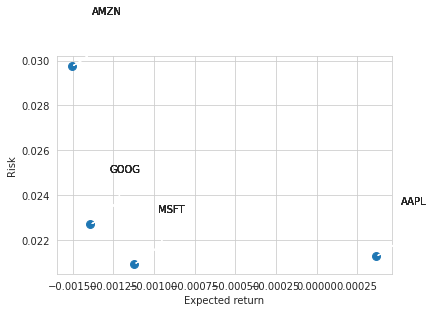

In [61]:
rets=tech_rets.dropna()
area= np.pi*20
plt.scatter(rets.mean(),rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

#matplotlib
for label, x , y in zip( rets.columns, rets.mean(), rets.std()):
  plt.annotate(
      label,
      xy= (x, y), xytext=(50, 50),
      textcoords='offset points', ha='right', va='bottom',
      arrowprops = dict(arrowstyle= '-' , connectionstyle= 'arc3, rad=-0.3'))


what we like is low risk and high return of money.

# Analsis value at risk

valus at risk is actually the amount of money we put at risk for a given confidence

-bootstrap method to caculate the "value at risk"

-The Value at Risk (VaR) is a measure of the amount of money that could be lost on an investment over a given period of time. It is calculated by taking the expected value of the losses and dividing it by the probability of those losses occurring.

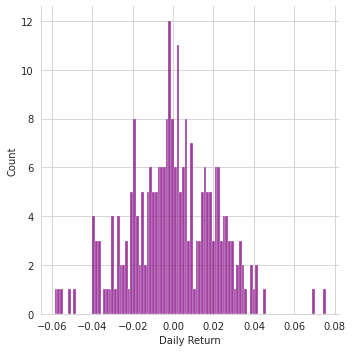

In [58]:
sns.displot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [59]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-11-02,0.007116,-0.001615,0.014530,0.011416
2021-11-03,0.009799,0.021508,0.006355,0.002612
2021-11-04,-0.003499,0.027482,0.012896,0.007305
2021-11-05,0.003582,0.012076,0.003753,-0.001129
2021-11-08,-0.005553,-0.008528,0.000740,0.002767


# value at risk using monte carlo simulation

In [60]:
rets['AAPL'].quantile(0.05)
#this gives us the confidence value of the stock
# it means your worse daily lost does not exist 95 percent of this [rets['AAPL'].quantile(0.05)]

-0.03666170880961667

The 0.05 empirical quantile of daily returns is at (result=[result of rets['AAPL'].quantile(0.05)] ). That means that with 95% confidence, worst daily loss will not exceed result*100 %. If we have a 1 million dollar investment, our one day 5% VaR is result * 1,000,000 = $???.

In [62]:
rets['MSFT'].quantile(0.05)

-0.038487516188206505

In [63]:
rets['GOOG'].quantile(0.05)

-0.03703731770592017

In [64]:
rets['AMZN'].quantile(0.05)

-0.05071771061227193

# Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we’ll calculate portfolio losses for each trial. After this, we’ll use the aggregation of all these simulations to establish how risky the stock is. Let’s start with a brief explanation of what we’re going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is “conditionally independent” of past price movements. This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can’t perfectly predict the future solely based on the previous price of a stock.
The equation for geometric Browninan motion is given by the following equation: 


ΔS/S=μ.Δt+σ.ϵ.√Δt


Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable. We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price. 


ΔS=S.(μ.Δt+σ.ϵ.√Δt)


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as “drift”, which is the average daily return multiplied by the change of time. The second term is known as “shock”, for each tiem period the stock will “drift” and then experience a “shock” which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.



In [65]:
# Set up time horizon and delta values
days = 365
dt = 1/days

# Calculate mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Calculate volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [69]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation, mu, sigma and returns simulated price array'''

    price = np.zeros(days)
    price[0] = start_price #SOMEWHERE to start
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Calculating and returning price array for number of days
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt)) # equal to σ.ϵ.√Δt
        drift[x] = mu * dt # equal to μ.Δt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [70]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,148.990005,149.699997,147.800003,148.960007,148.129959,74588300
2021-11-02,148.660004,151.570007,148.649994,150.020004,149.184036,69122000
2021-11-03,150.389999,151.970001,149.820007,151.490005,150.645859,54511500
2021-11-04,151.580002,152.429993,150.639999,150.960007,150.118805,60394600
2021-11-05,151.889999,152.199997,150.059998,151.279999,150.656570,65463900


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

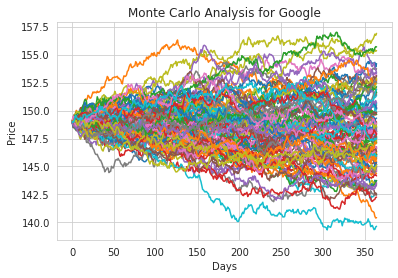

In [75]:
# Get start price from GOOG.head()
start_price = 148.99
simulations = np.zeros(100)

for run in range(100):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

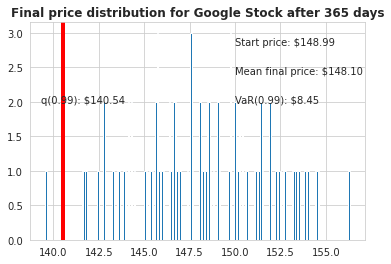

In [73]:
# Now we'll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between in our output
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');